In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

from UAVIR_tools import BIRDSAIDataset, imgBoxes
from torchvision import transforms as T

def frameVisualicer(dataset, movie_id, frame, 
                    figsize = [16, 9/2], res = 1920):
    # Recogemos información sobre el frame
    frame_init, frame_end, n_frames = dataset.getMovieBoxInfo(movie_id)

    # Recogemos la img del dataset
    img, target = dataset[frame_init + frame]
    print(target["boxes"])

    # Mostramos el resultado
    img_box_real = imgBoxes(img, target["boxes"], target["labels"])

    fig = plt.figure(figsize=figsize, dpi=res/figsize[0])
    ax1, ax2 = fig.subplots(1,2)
    plt.subplots_adjust(wspace=-0.2)

    ax1.axis('off')
    ax2.axis("off")

    ax1.set_title("Imágen original")
    ax2.set_title("Imágen original etiquetada")

    ax1.imshow(img)
    ax2.imshow(img_box_real)
    plt.show()

tensor([[534.,   2., 608.,  80.],
        [249., 292., 275., 313.],
        [318., 418., 338., 451.]])


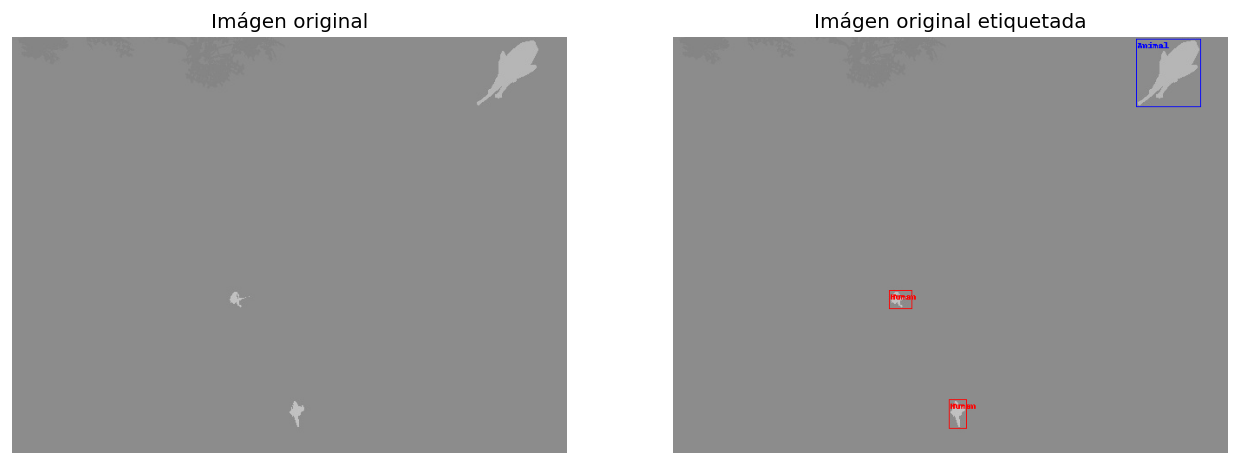

In [5]:
DATA_PATH = "D:\Datos\TrainSimulation"

# Dargamos el dataset
dataset = BIRDSAIDataset(DATA_PATH)

# Seleccionamos el vídeo y el frame
movie_id = 102
frame = 110

frameVisualicer(dataset, movie_id, frame)

In [18]:
# ------------------------------- #
# Mostremos una película completa #
# ------------------------------- #

from tqdm import tqdm
from  moviepy.editor import *

# Parámetros
FIGSIZE = [16, 9]
RES = 1280 # 720p
OUTPUT_IMGS_PATH = "tmp"
OUTPUT_MOVIE_PATH = "output"

def clean_dir(dir):
  for f in os.listdir(dir):
    os.remove(os.path.join(dir, f))

def genMovie(movie_id, dataset,
             figsize = FIGSIZE, res = RES, 
             output_imgs_path = OUTPUT_IMGS_PATH,
             output_movie_path = OUTPUT_MOVIE_PATH):
  # --------------------------------------------------------------------
  # Indicamos los frames a mostrar
  # ----------------------------------------------------------------------
  frame_init, frame_end, n_frames = dataset.getMovieInfo(movie_id)
  idxs = np.linspace(frame_init, frame_end, n_frames, dtype=int)

  # ----------------------------------------------------------------------
  # Generamos y guardamos todos las imágenes con su bounding box
  # ----------------------------------------------------------------------

  # Creamos los directorios de salida
  try:
    os.mkdir(output_movie_path)
  except:
    pass

  try:
    os.mkdir(output_imgs_path)
    clean_dir(output_imgs_path)
  except:
    clean_dir(output_imgs_path)

  # Renderizamos todos los frames
  print("Generando imágenes... ")
  for i in tqdm(range(len(idxs))):
    fig = plt.figure(figsize=figsize, dpi=res/figsize[0])
    ax = fig.add_subplot()
    ax.axis('off')

    img, target = dataset.frame(idxs[i])
    movie_id, frame, total_movie_frames = dataset.getFrameInfo(idxs[i])
    img_box = imgBoxes(img, target["boxes"], target["labels"])

    img_frame = ax.imshow(img_box)
    frame_text = ax.text(5, 10, "Frame: {0:>4}/{1:<4}".format(frame, total_movie_frames), c="g")
    movie_text = ax.text(5, 25, "Movie: {}".format(movie_id), c="g")

    plt.savefig(os.path.join(output_imgs_path, "frame{}.{}".format(str(i).zfill(5),"png")), 
                bbox_inches='tight', pad_inches = 0)
    plt.close()

  # Fusionamos todos los frames para generar un .mp4
  image_files = list(sorted([os.path.join(output_imgs_path,img)
                for img in os.listdir(output_imgs_path)
                if img.endswith(".png")]))
  clip = ImageSequenceClip(output_imgs_path, fps=25)
  clip.write_videofile(os.path.join(output_movie_path, "movie{}.mp4".format(str(movie_id).zfill(3))))

  # Eliminamos el directorio temporal
  try:
    clean_dir(output_imgs_path)
    os.rmdir(output_imgs_path)
  except:
    pass

In [19]:
dataset = BIRDSAIDataset(DATA_PATH)

# Generamos todas las películas
for i in [34]:
  genMovie(i, dataset)

Generando imágenes... 


100%|██████████| 834/834 [03:35<00:00,  3.86it/s]


Moviepy - Building video output\movie034.mp4.
Moviepy - Writing video output\movie034.mp4



Moviepy - Done !
Moviepy - video ready output\movie034.mp4


: 